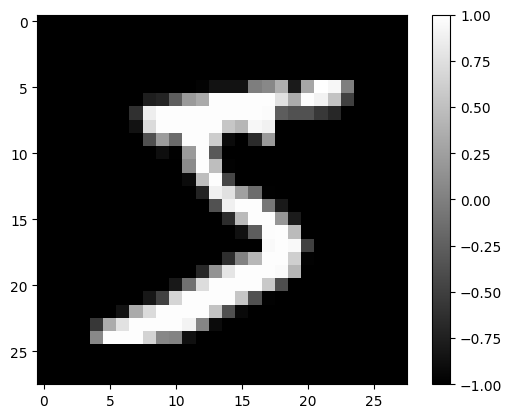

In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from torch import nn
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

preprocess = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
batch_size = 128
dataset = MNIST(root='', train=True, download=True, transform=preprocess)
loader_train = DataLoader(dataset, batch_size, shuffle=True)
plt.imshow(dataset[0][0].squeeze(), cmap='gray')
plt.colorbar()
plt.show()

Input shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 1, 28, 28])


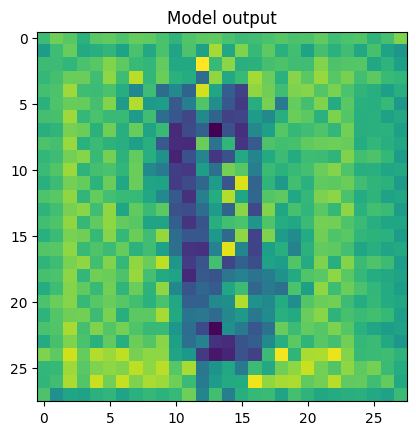

In [2]:
from unet import UNet

model = UNet(in_channels=1, out_channels=1, block_out_channels=[64, 128],)

sample_image = dataset[8][0].unsqueeze(0)
print("Input shape:", sample_image.shape)

print("Output shape:", model(sample_image, torch.ones(1)).shape)
plt.imshow(model(sample_image, torch.ones(1)).squeeze().detach().numpy())
plt.title("Model output")
plt.show()

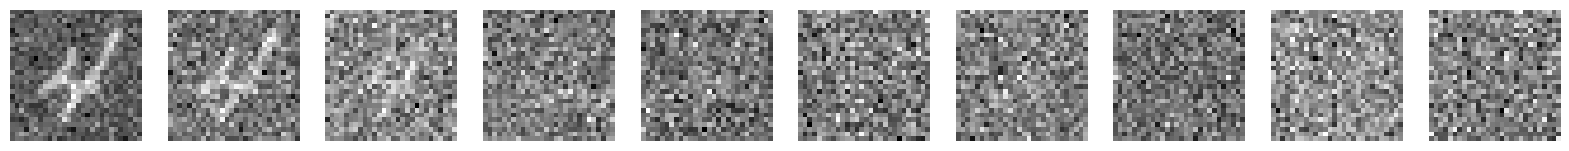

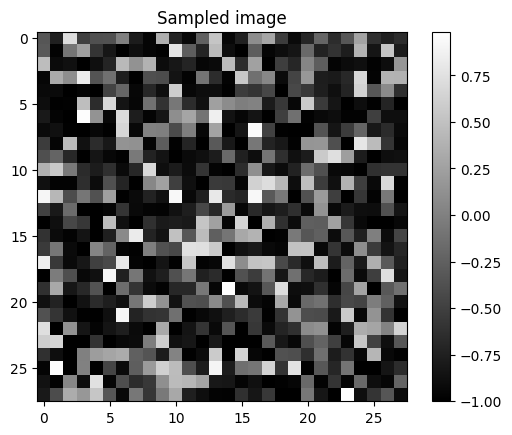

In [3]:
from ddpm import DDPM
        
model = DDPM(in_channels=1, out_channels=1, block_out_channels=[64, 128], device=device)
model.to(device)
sample_image = dataset[9][0].unsqueeze(0).to(device)
noised_image, noise = model(sample_image, 1)
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i,t in enumerate([99, 199, 299, 399, 499, 599, 699, 799, 899, 999]):
    noised_image = model(sample_image, t)
    axes[i].imshow(noised_image[0].squeeze().detach().cpu().numpy(), cmap='gray')
    axes[i].axis('off')

output = model.sampling(1000)
plt.figure()
plt.imshow(output.squeeze().detach().cpu().numpy(), cmap='gray')
plt.colorbar()
plt.title("Sampled image")
plt.show()

469it [00:17, 27.18it/s]


Epoch: 0, Loss: 0.5728670358657837


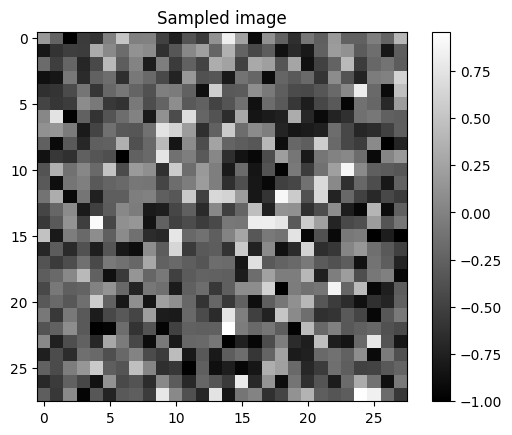

469it [00:16, 28.22it/s]


Epoch: 1, Loss: 0.38938722014427185


469it [00:16, 28.38it/s]


Epoch: 2, Loss: 0.2573232650756836


469it [00:16, 28.17it/s]


Epoch: 3, Loss: 0.25621458888053894


469it [00:16, 28.19it/s]


Epoch: 4, Loss: 0.15744954347610474


469it [00:16, 28.30it/s]


Epoch: 5, Loss: 0.10581305623054504


469it [00:16, 28.28it/s]


Epoch: 6, Loss: 0.09784112870693207


469it [00:16, 28.30it/s]


Epoch: 7, Loss: 0.10538805276155472


469it [00:16, 28.38it/s]


Epoch: 8, Loss: 0.06178800016641617


469it [00:16, 28.36it/s]


Epoch: 9, Loss: 0.060846637934446335


469it [00:16, 28.40it/s]


Epoch: 10, Loss: 0.027063079178333282


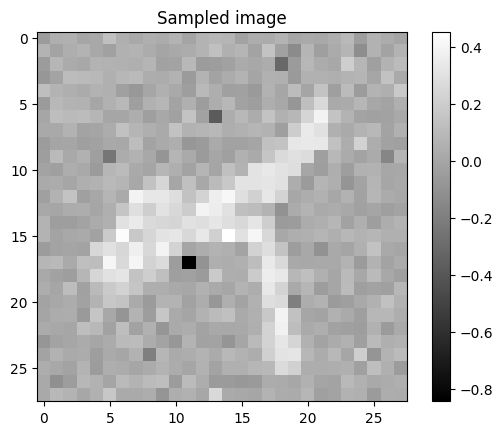

469it [00:16, 27.95it/s]


Epoch: 11, Loss: 0.01886465959250927


469it [00:16, 28.10it/s]


Epoch: 12, Loss: 0.01835603080689907


469it [00:16, 28.03it/s]


Epoch: 13, Loss: 0.04936681315302849


469it [00:16, 28.05it/s]


Epoch: 14, Loss: 0.02480471134185791


469it [00:16, 28.03it/s]


Epoch: 15, Loss: 0.03070026822388172


469it [00:16, 27.94it/s]


Epoch: 16, Loss: 0.006222870200872421


469it [00:16, 28.09it/s]


Epoch: 17, Loss: 0.02619539573788643


469it [00:16, 28.00it/s]


Epoch: 18, Loss: 0.05944058671593666


469it [00:16, 28.08it/s]


Epoch: 19, Loss: 0.0033954766113311052


469it [00:16, 28.19it/s]


Epoch: 20, Loss: 0.059448618441820145


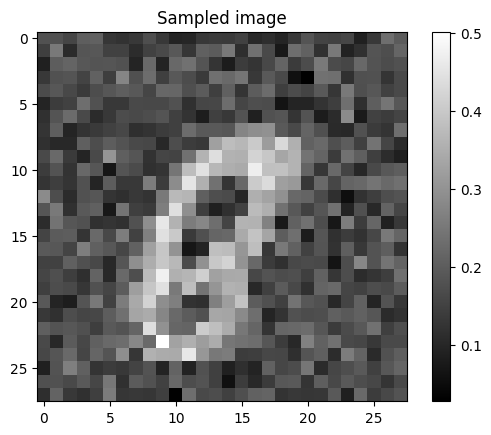

469it [00:16, 27.73it/s]


Epoch: 21, Loss: 0.002257556188851595


469it [00:16, 27.70it/s]


Epoch: 22, Loss: 0.0021680020727217197


469it [00:16, 27.84it/s]


Epoch: 23, Loss: 0.0022320144344121218


469it [00:16, 27.77it/s]


Epoch: 24, Loss: 0.11392032355070114


469it [00:16, 27.73it/s]


Epoch: 25, Loss: 0.005583384074270725


469it [00:17, 27.41it/s]


Epoch: 26, Loss: 0.0016506457468494773


469it [00:16, 27.75it/s]


Epoch: 27, Loss: 0.20383457839488983


469it [00:16, 27.70it/s]


Epoch: 28, Loss: 0.002335761673748493


469it [00:17, 27.54it/s]


Epoch: 29, Loss: 0.0008330961572937667


469it [00:16, 27.64it/s]


Epoch: 30, Loss: 0.0015404680743813515


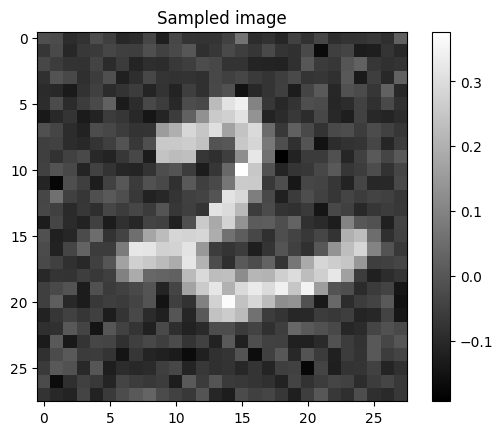

469it [00:16, 27.85it/s]


Epoch: 31, Loss: 0.034703031182289124


469it [00:16, 27.75it/s]


Epoch: 32, Loss: 0.022687504068017006


469it [00:17, 27.48it/s]


Epoch: 33, Loss: 0.0007627873565070331


469it [00:17, 27.53it/s]


Epoch: 34, Loss: 0.0006507200887426734


469it [00:17, 26.98it/s]


Epoch: 35, Loss: 0.02110692299902439


469it [00:17, 26.86it/s]


Epoch: 36, Loss: 0.029532184824347496


469it [00:16, 27.62it/s]


Epoch: 37, Loss: 0.0012127426452934742


148it [00:05, 27.24it/s]


KeyboardInterrupt: 

In [4]:
from random import randint
from tqdm import tqdm

def training(model, epochs, criterion, optimizer, loader_train, T = 1000):
    '''Training loop for the model.
    model: model to be trained.
    lr: learning rate.
    epochs: number of epochs.
    criterion: loss function.
    optimizer: optimizer to be used.
    loader_train: training data loader.'''
    model.train()
    for epoch in range(epochs):
        for i, (images, _) in tqdm(enumerate(loader_train)):
            images = images.to(device)
            t = randint(0, T-1)
            x_noised, noise = model.forward(images, t)
            optimizer.zero_grad()
            
            noise_pred = model.model(x_noised, t)
            loss = criterion(noise_pred, noise)
            loss.backward()
            optimizer.step()
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
        if epoch % 10 == 0:
            img = model.sampling(T)
            plt.imshow(img.squeeze().detach().cpu().numpy(), cmap='gray')
            plt.colorbar()
            plt.title("Sampled image")
            plt.show()
    return model

lr = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 200
model = training(model, epochs, criterion, optimizer, loader_train)


In [ ]:
torch.save(model.state_dict(), 'model.pth')